# Mini projekt PAD - scrapper danych o oponach
## Jakub Michalak S20034
### Opis projektu
- Projekt polega na pobraniu danych o oponach z dwóch sklepów internetowych: sklep opon i oponeo
- Opony są pobierane w rozmiarze 205/55R16 i sezonie zimowym
- Dane pobrane z obu sklepów zostaną zapisane w plikach CSV
- Dane zostaną oczyszczone i przygotowane do analizy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from rich.jupyter import display

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from scrappers.sklep_opon import scrap_sklep_opon
from scrappers.oponeo import scrap_oponeo
from common.file_utils import load_dataframe_from_csv_files

# 1. Scrapping danych
### 1.1. Konfiguracja drivera do scrapowania danych 
- **Uwaga**: testowane na szerokości okna 1110 pikseli
- Ustawienie szerokości okna na 1100 pikseli pozwala na poprawne działanie skryptów do scrapowania danych ze stron sklep opon i oponeo. Przy wyższej szerokości okna mogą wystąpić problemy z lokalizacją elementów na stronie (np. oceny).

In [4]:
download_service = Service()
driver = webdriver.Chrome(service=download_service)
driver.set_window_size(1100, 800)

### 1.2. Pobieranie danych ze strony sklep opon

In [9]:
scrap_sklep_opon(driver)

Proces scrapowania zakończony.


### 1.3. Pobieranie danych ze strony oponeo

In [5]:
scrap_oponeo(driver)

Rozpoczynam scrapowanie dla rozmiaru: 185/60R16
Okienko prywatności zostało zamknięte.
Brak nowych danych. Koniec paginacji.
Dane zapisano do pliku: data/oponeo/oponeo_185_60_16.csv
Zapisano aktualny rozmiar: 185/60R16
Zapisano ostatni rozmiar: 185/60R16
Rozpoczynam scrapowanie dla rozmiaru: 195/45R16
Okienko prywatności zostało zamknięte.
Brak nowych danych. Koniec paginacji.
Dane zapisano do pliku: data/oponeo/oponeo_195_45_16.csv
Zapisano aktualny rozmiar: 195/45R16
Zapisano ostatni rozmiar: 195/45R16
Rozpoczynam scrapowanie dla rozmiaru: 195/50R16
Okienko prywatności zostało zamknięte.
Brak nowych danych. Koniec paginacji.
Dane zapisano do pliku: data/oponeo/oponeo_195_50_16.csv
Zapisano aktualny rozmiar: 195/50R16
Zapisano ostatni rozmiar: 195/50R16
Rozpoczynam scrapowanie dla rozmiaru: 195/60R16
Okienko prywatności zostało zamknięte.
Brak nowych danych. Koniec paginacji.
Dane zapisano do pliku: data/oponeo/oponeo_195_60_16.csv
Zapisano aktualny rozmiar: 195/60R16
Zapisano ostatni

### 1.4. Zamknięcie drivera po scrapowaniu danych

In [5]:
driver.quit()

### 1.5. Odczyt danych z plików CSV

In [12]:
df_sklep_opon = load_dataframe_from_csv_files("data/sklep_opon")
display(df_sklep_opon)
df_oponeo = load_dataframe_from_csv_files("data/oponeo")
display(df_oponeo)

Ładowanie pliku: data/sklep_opon\sklep_opon_185_50R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_185_55R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_185_60R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_195_45R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_195_50R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_195_60R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_195_65R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_40R17.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_45R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_45R17.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_50R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_50R17.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_55R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_55R17.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_60R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_65R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_215_35R18.csv
Ładowanie plik

name     brand  \
0                BluEarth-A AE-50 185/50 R16 81 H  Yokohama   
1                    Nfera Primus 185/50 R16 81 V     Nexen   
2                          RPX800 185/50 R16 85 V     Radar   
3               Ziex ZE310 Ecorun 185/50 R16 81 V    Falken   
4                  AdvanteX TC101 185/50 R16 81 V  Triangle   
...                                           ...       ...   
21094  Scorpion Verde All Season 295/45 R19 113 W   Pirelli   
21095          Pilot Sport 4 SUV 295/45 R19 113 Y  Michelin   
21096        Ventus S1 evo3 K127 295/45 R19 113 Y   Hankook   
21097  Scorpion Verde All Season 295/45 R19 113 W   Pirelli   
21098                      PZERO 295/45 R19 113 Y   Pirelli   

                           model        size  load_index speed_index  \
0               BluEarth-A AE-50  185/50 R16        81.0           H   
1                   Nfera Primus  185/50 R16        81.0           V   
2                         RPX800  185/50 R16        85.0           V   
3              Ziex ZE310 Ecorun  185/50 R16        81.0           V   
4                 AdvanteX TC101  185/50 R16        81.0           V   
...                          ...         ...         ...         ...   
21094  Scorpion Verde All Season  295/45 R19       113.0           W   
21095          Pilot Sport 4 SUV  295/45 R19       113.0           Y   
21096        Ventus S1 evo3 K127  295/45 R19       113.0           Y   
21097  Scorpion Verde All Season  295/45 R19       113.0           W   
21098                      PZERO  295/45 R19       113.0           Y   

      fuel_index wet_grip_index noise_index  noise_level        class  \
0              D              C           B         68.0      Premium   
1              C              A           B         70.0      Średnia   
2              C              B           B         70.0  Ekonomiczna   
3              D              A           B         70.0      Średnia   
4              D              C           B         70.0          NaN   
...          ...            ...         ...          ...          ...   
21094          B              B           A         70.0      Premium   
21095          C              A           B         74.0      Premium   
21096          C              A           B         75.0      Premium   
21097          B              B           A         70.0      Premium   
21098          B              B           A         71.0      Premium   

       user_rating    price availability  
0              5.8   460.01         full  
1              5.4   384.24         full  
2              5.2   270.59         full  
3              5.5   398.48         full  
4              4.2   239.47         full  
...            ...      ...          ...  
21094          5.1  1132.08       medium  
21095          5.7  1070.29       medium  
21096          5.3   540.00         last  
21097          5.1  1124.21         last  
21098          5.6   640.30         last  

[21099 rows x 14 columns]

Ładowanie pliku: data/oponeo\oponeo_185_50_16.csv
Ładowanie pliku: data/oponeo\oponeo_185_55_16.csv
Ładowanie pliku: data/oponeo\oponeo_185_60_16.csv
Ładowanie pliku: data/oponeo\oponeo_195_45_16.csv
Ładowanie pliku: data/oponeo\oponeo_195_50_16.csv
Ładowanie pliku: data/oponeo\oponeo_195_60_16.csv
Ładowanie pliku: data/oponeo\oponeo_195_65_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_40_17.csv
Ładowanie pliku: data/oponeo\oponeo_205_45_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_45_17.csv
Ładowanie pliku: data/oponeo\oponeo_205_50_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_50_17.csv
Ładowanie pliku: data/oponeo\oponeo_205_55_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_55_17.csv
Ładowanie pliku: data/oponeo\oponeo_205_60_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_65_16.csv
Ładowanie pliku: data/oponeo\oponeo_215_35_18.csv
Ładowanie pliku: data/oponeo\oponeo_215_40_17.csv
Ładowanie pliku: data/oponeo\oponeo_215_40_18.csv
Ładowanie pliku: data/oponeo\oponeo_215_45_16.csv


name        brand  \
0                                                    NaN          NaN   
1                                                    NaN          NaN   
2            Continental UltraContact 185/50 R16 81 H FR  Continental   
3                          Firemax FM601 185/50 R16 81 V      Firemax   
4                     Barum Bravuris 5HM 185/50 R16 81 V        Barum   
...                                                  ...          ...   
14341                                                NaN          NaN   
14342  Hankook Ventus S1 Evo3 SUV K127A 295/45 R19 11...      Hankook   
14343     Michelin Pilot Sport 4 SUV 295/45 R19 113 Y XL     Michelin   
14344  Pirelli Scorpion Verde All Season 295/45 R19 1...      Pirelli   
14345     Pirelli P Zero 295/45 R19 113 Y (PZ3), XL, MGT      Pirelli   

                           model        size load_index speed_index  \
0                            NaN         NaN        NaN         NaN   
1                            NaN         NaN        NaN         NaN   
2                   UltraContact  185/50 R16       81.0           H   
3                          FM601  185/50 R16       81.0           V   
4                   Bravuris 5HM  185/50 R16       81.0           V   
...                          ...         ...        ...         ...   
14341                        NaN         NaN        NaN         NaN   
14342   Ventus S1 Evo3 SUV K127A  295/45 R19      113.0           Y   
14343          Pilot Sport 4 SUV  295/45 R19      113.0           Y   
14344  Scorpion Verde All Season  295/45 R19      113.0           W   
14345                     P Zero  295/45 R19      113.0           Y   

      fuel_index wet_grip_index noise_index  noise_level        class  \
0            NaN            NaN         NaN          NaN          NaN   
1            NaN            NaN         NaN          NaN          NaN   
2              C              A           B         70.0      Premium   
3              D              B           B         69.0  Ekonomiczna   
4              D              B           B         70.0  Ekonomiczna   
...          ...            ...         ...          ...          ...   
14341        NaN            NaN         NaN          NaN          NaN   
14342          C              A           B         75.0      Średnia   
14343          C              A           B         74.0      Premium   
14344          B              B           A         70.0      Premium   
14345          B              B           A         71.0      Premium   

       user_rating   price availability  
0              NaN     NaN      unknown  
1              NaN     NaN      unknown  
2              4.7   539.0       medium  
3              4.3   164.0         full  
4              4.4   269.0          low  
...            ...     ...          ...  
14341          NaN     NaN      unknown  
14342          4.6   616.0         full  
14343          4.8   976.0       medium  
14344          4.4  1109.0       medium  
14345          4.6  1132.0       medium  

[14346 rows x 14 columns]

### 1.6. Weryfikacja poprawnych wartości w każdej kolumnie

In [13]:
print("sklep opon")
print("typy danych w kolumnach")
print(df_sklep_opon.dtypes)
print("unikalne wartości w kolumnach")
for column in df_sklep_opon.columns:
    if column not in ["name", "brand", "model"]:
        print(column, df_sklep_opon[column].unique())
print("oponeo")
print("typy danych w kolumnach")
print(df_oponeo.dtypes)
print("unikalne wartości w kolumnach")
for column in df_oponeo.columns:
    if column not in ["name", "brand", "model"]:
        print(column, df_oponeo[column].unique())

sklep opon
typy danych w kolumnach
name               object
brand              object
model              object
size               object
load_index        float64
speed_index        object
fuel_index         object
wet_grip_index     object
noise_index        object
noise_level       float64
class              object
user_rating       float64
price             float64
availability       object
dtype: object
unikalne wartości w kolumnach
size ['185/50 R16' '185/55 R16' '185/60 R16' '195/45 R16' '195/50 R16'
 '195/60 R16' '195/65 R16' '205/40 R17' '205/45 R16' '205/45 R17'
 '205/50 R16' '205/50 R17' '205/55 R16' '205/55 R17' '205/60 R16'
 '205/65 R16' '215/35 R18' '215/40 R17' '215/40 R18' '215/45 R16'
 '215/45 R17' '215/45 R18' '215/50 R17' '215/50 R18' '215/55 R16'
 '215/55 R17' '215/55 R18' '215/60 R16' '215/60 R17' '215/65 R16'
 '215/65 R17' '225/35 R18' '225/35 R19' '225/40 R18' '225/40 R19'
 '225/45 R17' '225/45 R18' '225/45 R19' '225/50 R16' '225/50 R17'
 '225/50 R18' '225/50 R1

# 2. Czyszczenie i przygotowanie danych

### 2.1. konwersja kolumn do typów numerycznych i typu category

In [3]:
def update_column_types(param_df):
    param_df['noise_level'] = pd.to_numeric(param_df['noise_level'], errors='coerce').astype('Int64')
    param_df['user_rating'] = pd.to_numeric(param_df['user_rating'], errors='coerce').astype(float)
    param_df['price'] = param_df['price'].replace({' ': ''}, regex=True)
    param_df['price'] = pd.to_numeric(param_df['price'], errors='coerce').astype(float)
    param_df['size'] = param_df['size'].astype('category')
    param_df['load_index'] = param_df['load_index'].astype('category')
    param_df['speed_index'] = param_df['speed_index'].astype('category')
    param_df['fuel_index'] = param_df['fuel_index'].astype('category')
    param_df['wet_grip_index'] = param_df['wet_grip_index'].astype('category')
    param_df['noise_index'] = param_df['noise_index'].astype('category')
    param_df['class'] = param_df['class'].astype('category')
    param_df['availability'] = param_df['availability'].astype('category')
    param_df['user_rating'] = param_df['user_rating'].astype('float32')
    

def drop_invalid_sklep_opon_data(param_df):
    param_df = param_df.dropna(subset=['load_index'])
    param_df = param_df.dropna(subset=['fuel_index'])
    param_df = param_df.dropna(subset=['wet_grip_index'])
    param_df = param_df.dropna(subset=['noise_index'])
    param_df = param_df.dropna(subset=['noise_level'])
    param_df['user_rating'] = param_df['user_rating'].fillna(0)
    return param_df

def drop_invalid_oponeo_data(param_df):
    param_df = param_df.dropna(subset=['load_index'])
    param_df = param_df.dropna(subset=['speed_index'])
    param_df = param_df.dropna(subset=['fuel_index'])
    param_df = param_df.dropna(subset=['wet_grip_index'])
    param_df = param_df.dropna(subset=['noise_index'])
    param_df = param_df.dropna(subset=['noise_level'])
    param_df['load_index'] = param_df['load_index'].cat.rename_categories({'108/106': '106'})
    param_df['user_rating'] = param_df['user_rating'].fillna(0)
    return param_df

In [14]:
df_sklep_opon['speed_index'] = df_sklep_opon['speed_index'].replace({'(Y)': 'Y'})
update_column_types(df_oponeo)
update_column_types(df_sklep_opon)

### 2.2. Funkcje pomocnicze

In [5]:
def find_closest_key(value, param_map):
        closest_key = min(param_map, key=lambda k: abs(param_map[k] - value))
        return closest_key

def find_closest_value(value, param_map):
        closest_key = min(param_map, key=lambda k: abs(param_map[k] - value))
        return param_map[closest_key]

### 2.3. Uzupełnianie noise_index na podstawie noise_level

In [15]:
def update_noise_index_column(df):
    grouped_noise_index = df.groupby('noise_index', observed=False)['noise_level'].mean().round().astype(int)
    
    if 'C' not in grouped_noise_index:
        if 'B' in grouped_noise_index and 'A' in grouped_noise_index:
            grouped_noise_index['C'] = grouped_noise_index['B'] + (grouped_noise_index['B'] - grouped_noise_index['A'])
    
    noise_map = grouped_noise_index.to_dict()
    
    def apply_update_noise_index(row):
        if pd.notna(row['noise_level']) and pd.isna(row['noise_index']):
            return find_closest_key(row['noise_level'], noise_map)
        return row['noise_index']
    
    df['noise_index'] = df.apply(apply_update_noise_index, axis=1)
    
    return df

df_oponeo = update_noise_index_column(df_oponeo)
df_sklep_opon = update_noise_index_column(df_sklep_opon)

print("Zaktualizowano noise_index")
print(df_oponeo['noise_index'].unique())
print(df_sklep_opon['noise_index'].unique())

Zaktualizowano noise_index
[nan 'B' 'A' 'C']
['B' nan 'A' 'C']


### 2.4. Uzupełnianie ceny na podstawie średniej ceny i klasy na podstawie ceny

In [16]:
def update_price_column(param_df):
    class_price_map = param_df.groupby('class', observed=False)['price'].mean().to_dict()
    
    def apply_update_price(row):
        if pd.isna(row['price']):
            return find_closest_value(row['price'], class_price_map)
        return row['price']
    
    def apply_update_class(row):
        if pd.isna(row['class']):
            return find_closest_key(row['price'], class_price_map)
        return row['class']
    
    param_df['price'] = param_df.apply(apply_update_price, axis=1)
    param_df['class'] = param_df.apply(apply_update_class, axis=1)
    
    return param_df

df_oponeo = update_price_column(df_oponeo)
df_sklep_opon = update_price_column(df_sklep_opon)

print("Zaktualizowano cenę i klasę")
print("oponeo")
print(df_oponeo['price'].unique())
print(df_oponeo['class'].unique())
print("sklep opon")
print(df_sklep_opon['price'].unique())
print(df_sklep_opon['class'].unique())

Zaktualizowano cenę i klasę
oponeo
[ 416.05413422  539.          164.         ... 1753.         1837.
 1109.        ]
['Ekonomiczna' 'Premium' 'Średnia']
sklep opon
[ 460.01  384.24  270.59 ... 1070.29 1124.21  640.3 ]
['Premium' 'Średnia' 'Ekonomiczna']


### 2.5. Usunięcie brakujących wartości i ponowna weryfikacja wartości w kolumnach

In [17]:
# df_sklep_opon = df_sklep_opon.dropna(subset=['load_index'])
# df_sklep_opon = df_sklep_opon.dropna(subset=['fuel_index'])
# df_sklep_opon = df_sklep_opon.dropna(subset=['wet_grip_index'])
# df_sklep_opon = df_sklep_opon.dropna(subset=['noise_index'])
# df_sklep_opon = df_sklep_opon.dropna(subset=['noise_level'])
# df_sklep_opon['user_rating'] = df_sklep_opon['user_rating'].fillna(0)
drop_invalid_sklep_opon_data(df_sklep_opon)
drop_invalid_oponeo_data(df_oponeo)
# df_oponeo = df_oponeo.dropna(subset=['load_index'])
# df_oponeo = df_oponeo.dropna(subset=['speed_index'])
# df_oponeo = df_oponeo.dropna(subset=['fuel_index'])
# df_oponeo = df_oponeo.dropna(subset=['wet_grip_index'])
# df_oponeo = df_oponeo.dropna(subset=['noise_index'])
# df_oponeo = df_oponeo.dropna(subset=['noise_level'])
# df_oponeo['load_index'] = df_sklep_opon['load_index'].cat.rename_categories({'108/106': '106'})
# df_oponeo['user_rating'] = df_sklep_opon['user_rating'].fillna(0)

print("sklep opon")
print("typy danych w kolumnach")
print(df_sklep_opon.dtypes)
print("unikalne wartości w kolumnach")
for column in df_sklep_opon.columns:
    if column not in ["name", "brand", "model", "price", "size"]:
        print(column, df_sklep_opon[column].unique().tolist())
print("oponeo")
print("typy danych w kolumnach")
print(df_oponeo.dtypes)
print("unikalne wartości w kolumnach")
for column in df_oponeo.columns:
    if column not in ["name", "brand", "model", "price", "size"]:
        print(column, df_oponeo[column].unique().tolist())

sklep opon
typy danych w kolumnach
name                object
brand               object
model               object
size              category
load_index        category
speed_index       category
fuel_index        category
wet_grip_index    category
noise_index         object
noise_level          Int64
class               object
user_rating        float32
price              float64
availability      category
dtype: object
unikalne wartości w kolumnach
load_index [81.0, 85.0, 83.0, 87.0, 86.0, 84.0, 80.0, 88.0, 89.0, 99.0, 93.0, 104.0, 100.0, 92.0, 91.0, 94.0, 95.0, 96.0, 107.0, 103.0, 90.0, 97.0, 98.0, 109.0, 108.0, 102.0, 106.0, 101.0, 105.0, 111.0, 112.0, 121.0, 118.0, 116.0, 115.0, 117.0, 110.0, 114.0, 113.0]
speed_index ['H', 'V', 'T', 'W', 'R', 'Y', 'N', 'S', 'Q']
fuel_index ['D', 'C', 'B', 'A', 'E']
wet_grip_index ['C', 'A', 'B', 'D', 'E']
noise_index ['B', 'A', 'C']
noise_level [68, 70, 71, 69, 67, 66, 72, 73, 65, 74, 75]
class ['Premium', 'Średnia', 'Ekonomiczna']
user_rating 

### 2.6. Znalezienie, uzupełnienie i usunięcie duplikatów
- Funkcja do identyfikacji duplikatów na podstawie 'name', 'brand', 'model' i wypełniania brakujących danych
- Usuwa duplikaty na podstawie ilości uzupełnionych kolumn - zostawia wiersz z największą ilością uzupełnionych kolumn

In [18]:
def fill_missing_with_duplicates(df_param):
    columns_subset = ['name', 'brand', 'model', 'size']
    duplicates = df_param[df_param.duplicated(subset=columns_subset, keep=False)]
    
    for idx, group in duplicates.groupby(columns_subset, observed=True):  # Dodano observed=True
        for col in df_param.columns:
            if group[col].isna().any():
                # Jeśli mamy wartości do wypełnienia, to szukamy pierwszej dostępnej wartości
                fill_value = group[col].dropna().iloc[0] if not group[col].dropna().empty else None
                if fill_value is not None:  # Tylko wypełniaj, jeśli fill_value nie jest None
                    df_param.loc[group.index, col] = df_param.loc[group.index, col].fillna(fill_value)

    df_param['non_nan_count'] = df_param.notna().sum(axis=1)
    
    # Sprawdzenie, czy grupa nie jest pusta przed idxmax()
    group_max_idx = df_param.groupby(columns_subset, observed=True)['non_nan_count'].apply(
        lambda x: x.idxmax() if not x.empty else None
    ).dropna()
    
    df_param = df_param.loc[group_max_idx]
    df_param.drop(columns=['non_nan_count'], inplace=True)
    
    return df_param

print("Przed usunięciem duplikatów")
print("sklep opon: ", df_sklep_opon.shape)
print("oponeo: ", df_oponeo.shape)

df_sklep_opon = fill_missing_with_duplicates(df_sklep_opon)
df_oponeo = fill_missing_with_duplicates(df_oponeo)

print("Po usunięciu duplikatów")
print("sklep opon: ", df_sklep_opon.shape)
print("oponeo: ", df_oponeo.shape)

Przed usunięciem duplikatów
sklep opon:  (16395, 14)
oponeo:  (12205, 14)
Po usunięciu duplikatów
sklep opon:  (11164, 14)
oponeo:  (11133, 14)


### 2.7. Wyświetlenie danych po czyszczeniu i zapisanie do plików CSV

In [21]:
print("sklep opon")
print("typy danych w kolumnach")
print(df_sklep_opon.dtypes)
print("unikalne wartości w kolumnach")
for column in df_sklep_opon.columns:
    if column not in ["name", "brand", "model"]:
        print(column, df_sklep_opon[column].unique())
display(df_sklep_opon)

print("oponeo")
print("typy danych w kolumnach")
print(df_oponeo.dtypes)
print("unikalne wartości w kolumnach")
for column in df_oponeo.columns:
    if column not in ["name", "brand", "model"]:
        print(column, df_oponeo[column].unique())
display(df_oponeo)

df_oponeo.to_csv("data/cleaned/oponeo.csv", index=False)
df_sklep_opon.to_csv("data/cleaned/sklep_opon.csv", index=False)

sklep opon
typy danych w kolumnach
name                object
brand               object
model               object
size              category
load_index        category
speed_index       category
fuel_index        category
wet_grip_index    category
noise_index       category
noise_level          Int64
class             category
user_rating        float32
price              float64
availability      category
retailer            object
dtype: object
unikalne wartości w kolumnach
size ['195/65 R16', '225/65 R16', '225/75 R16', '255/55 R18', '215/55 R18', ..., '245/55 R18', '265/45 R19', '295/40 R19', '225/50 R19', '295/45 R19']
Length: 129
Categories (129, object): ['185/50 R16', '185/55 R16', '185/60 R16', '195/45 R16', ..., '295/30 R19', '295/35 R19', '295/40 R19', '295/45 R19']
load_index [104.0, 112.0, 118.0, 109.0, 99.0, ..., 115.0, 80.0, 113.0, 114.0, 85.0]
Length: 39
Categories (39, float64): [80.0, 81.0, 83.0, 84.0, ..., 116.0, 117.0, 118.0, 121.0]
speed_index ['R', 'V', 'H', 'W

name    brand            model        size  \
0              101 195/65 R16 104/102 R    Orium              101  195/65 R16   
1              101 225/65 R16 112/110 R    Orium              101  225/65 R16   
2              101 225/75 R16 118/116 R    Orium              101  225/75 R16   
3             4x4 Road 255/55 R18 109 V    Fulda         4x4 Road  255/55 R18   
4                   701 215/55 R18 99 V    Orium              701  215/55 R18   
...                                 ...      ...              ...         ...   
11159   iON ST AS IH61A 215/60 R17 96 V  Hankook  iON ST AS IH61A  215/60 R17   
11160  iON ST AS IH61A 225/55 R18 102 V  Hankook  iON ST AS IH61A  225/55 R18   
11161  iON ST AS IH61A 225/60 R18 104 W  Hankook  iON ST AS IH61A  225/60 R18   
11162  iON ST AS IH61A 235/55 R18 100 V  Hankook  iON ST AS IH61A  235/55 R18   
11163  iON ST AS IH61A 235/60 R18 103 V  Hankook  iON ST AS IH61A  235/60 R18   

      load_index speed_index fuel_index wet_grip_index noise_index  \
0          104.0           R          D              C           B   
1          112.0           R          D              C           B   
2          118.0           R          D              C           B   
3          109.0           V          C              C           B   
4           99.0           V          D              C           B   
...          ...         ...        ...            ...         ...   
11159       96.0           V          B              D           B   
11160      102.0           V          B              D           B   
11161      104.0           W          B              D           B   
11162      100.0           V          B              D           B   
11163      103.0           V          B              D           B   

       noise_level    class  user_rating   price availability    retailer  
0               72  Średnia          0.0  611.62       medium  Sklep opon  
1               72  Premium          0.0  672.80       medium  Sklep opon  
2               72  Średnia          0.0  648.08       medium  Sklep opon  
3               73  Średnia          4.7  567.21         full  Sklep opon  
4               71  Premium          0.0  669.68       medium  Sklep opon  
...            ...      ...          ...     ...          ...         ...  
11159           70  Premium          0.0  523.25         full  Sklep opon  
11160           70  Premium          0.0  634.24         full  Sklep opon  
11161           69  Premium          0.0  743.14         full  Sklep opon  
11162           70  Premium          0.0  591.50         full  Sklep opon  
11163           70  Premium          0.0  683.23         full  Sklep opon  

[11164 rows x 15 columns]

oponeo
typy danych w kolumnach
name                object
brand               object
model               object
size              category
load_index        category
speed_index       category
fuel_index        category
wet_grip_index    category
noise_index       category
noise_level          Int64
class             category
user_rating        float32
price              float64
availability      category
retailer            object
dtype: object
unikalne wartości w kolumnach
size ['245/35 R19', '245/45 R19', '255/35 R18', '255/40 R17', '205/50 R17', ..., '195/65 R16', '225/75 R16', '225/65 R16', '295/45 R19', '245/55 R18']
Length: 129
Categories (129, object): ['185/50 R16', '185/55 R16', '185/60 R16', '195/45 R16', ..., '295/30 R19', '295/35 R19', '295/40 R19', '295/45 R19']
load_index [NaN, 103.0, 95.0, 96.0, 83.0, ..., 118.0, 80.0, 115.0, 111.0, 117.0]
Length: 37
Categories (36, float64): [80.0, 81.0, 83.0, 84.0, ..., 116.0, 117.0, 118.0, 121.0]
speed_index ['Y', 'W', 'H', 'V', 'T',

name     brand       model  \
0         Accelera PHI 245/35 R19 93 Y XL, ZR  Accelera         PHI   
1        Accelera PHI 245/45 R19 102 Y XL, ZR  Accelera         PHI   
2         Accelera PHI 255/35 R18 94 Y XL, ZR  Accelera         PHI   
3         Accelera PHI 255/40 R17 98 W XL, ZR  Accelera         PHI   
4      Alliance 030EX 205/50 R17 93 W XL, RPB  Alliance       030EX   
...                                       ...       ...         ...   
11128           Zeetex ZT1000 205/65 R16 95 V    Zeetex      ZT1000   
11129       Zeetex ZT6000 eco 205/55 R16 91 V    Zeetex  ZT6000 eco   
11130       Zeetex ZT6000 eco 205/60 R16 92 V    Zeetex  ZT6000 eco   
11131       Zeetex ZT6000 eco 215/60 R16 95 V    Zeetex  ZT6000 eco   
11132       Zeetex ZT6000 eco 215/65 R16 98 H    Zeetex  ZT6000 eco   

             size load_index speed_index fuel_index wet_grip_index  \
0      245/35 R19        NaN           Y          C              C   
1      245/45 R19      103.0           Y          C              C   
2      255/35 R18       95.0           Y          C              C   
3      255/40 R17       96.0           W          C              C   
4      205/50 R17       83.0           W          C              C   
...           ...        ...         ...        ...            ...   
11128  205/65 R16        NaN           V          D              C   
11129  205/55 R16       84.0           V          D              C   
11130  205/60 R16       93.0           V          D              C   
11131  215/60 R16        NaN           V          D              C   
11132  215/65 R16       91.0           H          D              C   

      noise_index  noise_level        class  user_rating  price availability  \
0               B           70  Ekonomiczna          NaN  564.0       medium   
1               B           70  Ekonomiczna          5.1  629.0       medium   
2               A           70  Ekonomiczna          5.1  502.0       medium   
3               A           70  Ekonomiczna          5.1  473.0       medium   
4               B           71  Ekonomiczna          5.6  385.0         full   
...           ...          ...          ...          ...    ...          ...   
11128           B           71      Średnia          NaN  371.0         full   
11129           B           71      Średnia          5.0  189.0         full   
11130           B           71      Średnia          4.8  204.0         full   
11131           B           71      Średnia          NaN  217.0         full   
11132           B           71      Średnia          3.4  229.0         full   

      retailer  
0       Oponeo  
1       Oponeo  
2       Oponeo  
3       Oponeo  
4       Oponeo  
...        ...  
11128   Oponeo  
11129   Oponeo  
11130   Oponeo  
11131   Oponeo  
11132   Oponeo  

[11133 rows x 15 columns]

# 3. Eksploracyjna Analiza danych

- Opcjonalne ładowanie oczyszczonych danych z plików CSV jeżeli nie chcemy ponownie scrapować danych

In [4]:
df_oponeo = pd.read_csv("data/cleaned/oponeo.csv", delimiter=",")
df_sklep_opon = pd.read_csv("data/cleaned/sklep_opon.csv", delimiter=",")
update_column_types(df_oponeo)
update_column_types(df_sklep_opon)
drop_invalid_sklep_opon_data(df_sklep_opon)
drop_invalid_oponeo_data(df_oponeo)

df_oponeo['retailer'] = 'Oponeo'
df_sklep_opon['retailer'] = 'Sklep opon'
df = pd.concat([df_oponeo, df_sklep_opon], ignore_index=True)


### 3.1. Średnia, mediana, min i max cen opon w każdym sklepie

In [16]:
price_stats = df.groupby('retailer')['price'].agg(['mean', 'median', 'min', 'max'])
price_stats

mean  median     min      max
retailer                                       
Oponeo      549.879098  514.00  147.00  2870.00
Sklep opon  620.162906  524.99  156.77  7978.59

### 3.3. Średnia cena opon w zależności od klasy i sklepu

In [17]:
class_price_stats = df.groupby(['retailer', 'class'], observed=False)['price'].mean().unstack()
class_price_stats

class       Ekonomiczna     Premium     Średnia
retailer                                       
Oponeo       410.230786  709.482186  534.727127
Sklep opon   386.314343  814.549719  554.590718

### 3.4. Liczba opon w każdej klasie efektywności w obu sklepach

In [18]:
class_distribution = df.groupby(['retailer', 'class'], observed=False).size().unstack()
class_distribution

class       Ekonomiczna  Premium  Średnia
retailer                                 
Oponeo             4476     4154     2503
Sklep opon         3343     4980     2841

### 3.5. Średnia ceny opon w zależności od:
 - sklepu oraz indeksów: paliwowego, przyczepności i hałasu
 - sklepu oraz nośności
 - sklepu oraz indeksu prędkości

In [19]:
# Grupowanie danych według rozmiaru i liczenie wystąpień
size_counts = df['size'].value_counts()

# Losowy liczny rozmiar opony
common_size = size_counts.index[2]

filtered_df = df[df['size'] == common_size]


pivot_price_indices = filtered_df.pivot_table(
    values='price',
    index='retailer',
    columns=['fuel_index', 'wet_grip_index', 'noise_index'],
    aggfunc='mean',
    observed=False
)
display(pivot_price_indices)

pivot_price_speed_load = filtered_df.pivot_table(
    values='price',
    index='retailer',
    columns='speed_index',
    aggfunc='mean',
    observed=False
)
display(pivot_price_speed_load)

fuel_index           A                                             B  \
wet_grip_index       A                     B                       A   
noise_index          A           B         A           B           A   
retailer                                                               
Oponeo          461.00  557.615385  625.8000  521.777778  550.666667   
Sklep opon      404.59  521.341000  560.9475  550.701000  670.112500   

fuel_index                                                         ...  \
wet_grip_index                       B              C              ...   
noise_index              B           B       C      A           B  ...   
retailer                                                           ...   
Oponeo          526.800000  465.200000     NaN  369.0  384.000000  ...   
Sklep opon      576.276154  451.630625  370.71    NaN  411.166667  ...   

fuel_index               C                                          D          \
wet_grip_index           A         B                       C        A           
noise_index              B         A           B           B        A       B   
retailer                                                                        
Oponeo          493.357143  397.0000  394.305556  413.107143      NaN  518.50   
Sklep opon      466.148214  346.0175  418.447258  440.808125  338.335  475.86   

fuel_index                                          E  
wet_grip_index           B           C      D       C  
noise_index              B           B      B       B  
retailer                                               
Oponeo          455.375000  362.400000  297.5  322.60  
Sklep opon      465.588333  362.744545  411.3  316.58  

[2 rows x 22 columns]

speed_index           H           V           W      Y
retailer                                              
Oponeo       436.484536  429.039683  557.500000  667.0
Sklep opon   434.824787  453.312523  572.302632  566.9

### 3.6. Porównanie:
 - cen opon w obu sklepach dla tych samych modeli
  - dostępności opon w obu sklepach dla tych samych modeli
  - ocen użytkowników opon w obu sklepach dla tych samych modeli

In [21]:
# pd.options.display.max_rows = 10
pd.options.display.max_rows = None

common_tires = (
    df.groupby(['brand', 'model', 'size'], observed=False)['retailer']
    .nunique()
    .reset_index()
    .query('retailer == 2')  # Wybieramy tylko te, które występują u obu sprzedawców
)
print(f"Znaleziono {len(common_tires)} wspólnych opon.")
# common_tires = common_tires#.sample(n=50, random_state=42)
display(common_tires)

oponeo_prices_and_ratings = df[
    (df['retailer'] == 'Oponeo') & 
    (df[['brand', 'model', 'size']].apply(tuple, axis=1).isin(common_tires[['brand', 'model', 'size']].apply(tuple, axis=1)))
][['brand', 'model', 'size', 'price', 'user_rating']] \
    .rename(columns={'price': 'price_oponeo', 'user_rating': 'user_rating_oponeo'}) \
    .sort_values(by=['price_oponeo', 'user_rating_oponeo'], ascending=[True, False]) \
    .drop_duplicates(subset=['brand', 'model', 'size'], keep='first')
oponeo_prices_and_ratings['user_rating_oponeo'] = oponeo_prices_and_ratings['user_rating_oponeo'].fillna(0)

print(f"Ceny i oceny dla Oponeo - liczba rekordów: {len(oponeo_prices_and_ratings)}")
display(oponeo_prices_and_ratings)

sklep_opon_prices_and_ratings = df[
    (df['retailer'] == 'Sklep opon') & 
    (df[['brand', 'model', 'size']].apply(tuple, axis=1).isin(common_tires[['brand', 'model', 'size']].apply(tuple, axis=1)))
][['brand', 'model', 'size', 'price', 'user_rating']] \
    .rename(columns={'price': 'price_sklep_opon', 'user_rating': 'user_rating_sklep_opon'}) \
    .sort_values(by=['price_sklep_opon', 'user_rating_sklep_opon'], ascending=[True, False]) \
    .drop_duplicates(subset=['brand', 'model', 'size'], keep='first')
sklep_opon_prices_and_ratings['user_rating_sklep_opon'] = sklep_opon_prices_and_ratings['user_rating_sklep_opon'].fillna(0)

print(f"Ceny i oceny dla Sklep opon - liczba rekordów: {len(sklep_opon_prices_and_ratings)}")
display(sklep_opon_prices_and_ratings)

comparison_df = pd.merge(
    oponeo_prices_and_ratings,
    sklep_opon_prices_and_ratings,
    on=['brand', 'model', 'size'],
    how='inner'
)

comparison_df['cheaper_in'] = comparison_df.apply(
    lambda row: 'Oponeo' if row['price_oponeo'] < row['price_sklep_opon'] else 'Sklep opon' if row['price_oponeo'] > row['price_sklep_opon'] else 'Same price',
    axis=1
)

comparison_df['better_rating_in'] = comparison_df.apply(
    lambda row: 'Oponeo' if row['user_rating_oponeo'] > row['user_rating_sklep_opon'] else 'Sklep opon' if row['user_rating_oponeo'] < row['user_rating_sklep_opon'] else 'Same rating',
    axis=1
)

print(f"Wynikowy DataFrame - liczba rekordów: {len(comparison_df)}")
display(comparison_df)


Znaleziono 3609 wspólnych opon.


brand                        model        size  retailer
468142          Apollo                     Alnac 4G  185/55 R16         2
468145          Apollo                     Alnac 4G  195/50 R16         2
468153          Apollo                     Alnac 4G  205/55 R16         2
468155          Apollo                     Alnac 4G  205/60 R16         2
468168          Apollo                     Alnac 4G  215/60 R16         2
468169          Apollo                     Alnac 4G  215/60 R17         2
469365          Apollo                   Aspire 4G+  235/55 R17         2
895436           Arivo             Traverso ARV H/T  225/60 R17         2
895439           Arivo             Traverso ARV H/T  225/65 R17         2
895456           Arivo             Traverso ARV H/T  235/60 R18         2
895458           Arivo             Traverso ARV H/T  235/65 R17         2
895488           Arivo             Traverso ARV H/T  255/55 R19         2
1850078          Barum                   Bravuris 2  255/40 R17         2
1850192          Barum                 Bravuris 3HM  245/40 R18         2
1850195          Barum                 Bravuris 3HM  245/45 R18         2
1850298          Barum                 Bravuris 4x4  225/70 R16         2
1850376          Barum                 Bravuris 5HM  185/50 R16         2
1850379          Barum                 Bravuris 5HM  195/45 R16         2
1850380          Barum                 Bravuris 5HM  195/50 R16         2
1850381          Barum                 Bravuris 5HM  195/60 R16         2
1850383          Barum                 Bravuris 5HM  205/40 R17         2
1850384          Barum                 Bravuris 5HM  205/45 R16         2
1850385          Barum                 Bravuris 5HM  205/45 R17         2
1850386          Barum                 Bravuris 5HM  205/50 R16         2
1850387          Barum                 Bravuris 5HM  205/50 R17         2
1850388          Barum                 Bravuris 5HM  205/55 R16         2
1850389          Barum                 Bravuris 5HM  205/55 R17         2
1850390          Barum                 Bravuris 5HM  205/60 R16         2
1850393          Barum                 Bravuris 5HM  215/40 R17         2
1850394          Barum                 Bravuris 5HM  215/40 R18         2
1850395          Barum                 Bravuris 5HM  215/45 R16         2
1850396          Barum                 Bravuris 5HM  215/45 R17         2
1850397          Barum                 Bravuris 5HM  215/45 R18         2
1850398          Barum                 Bravuris 5HM  215/50 R17         2
1850399          Barum                 Bravuris 5HM  215/50 R18         2
1850400          Barum                 Bravuris 5HM  215/55 R16         2
1850401          Barum                 Bravuris 5HM  215/55 R17         2
1850402          Barum                 Bravuris 5HM  215/55 R18         2
1850403          Barum                 Bravuris 5HM  215/60 R16         2
1850404          Barum                 Bravuris 5HM  215/60 R17         2
1850405          Barum                 Bravuris 5HM  215/65 R16         2
1850406          Barum                 Bravuris 5HM  215/65 R17         2
1850407          Barum                 Bravuris 5HM  225/35 R18         2
1850408          Barum                 Bravuris 5HM  225/35 R19         2
1850409          Barum                 Bravuris 5HM  225/40 R18         2
1850410          Barum                 Bravuris 5HM  225/40 R19         2
1850411          Barum                 Bravuris 5HM  225/45 R17         2
1850412          Barum                 Bravuris 5HM  225/45 R18         2
1850413          Barum                 Bravuris 5HM  225/45 R19         2
1850414          Barum                 Bravuris 5HM  225/50 R16         2
1850415          Barum                 Bravuris 5HM  225/50 R17         2
1850416          Barum                 Bravuris 5HM  225/50 R18         2
1850418          Barum                 Bravuris 5HM  225/55 R16         2
1850419          Baru

Ceny i oceny dla Oponeo - liczba rekordów: 3609


brand                        model        size  price_oponeo  \
2752        Firemax                        FM601  205/55 R16         172.0   
9230        Sunwide                       RS-ONE  205/55 R16         204.0   
2777        Firemax                        FM601  225/60 R16         214.0   
4837       Kormoran             Road Performance  195/45 R16         219.0   
9167          Sonix                    ECOPRO 99  205/55 R16         220.0   
4843       Kormoran             Road Performance  205/55 R16         222.0   
3425       Goodride               ZuperEco Z-107  215/65 R16         223.0   
9189          Sonix                 PRIMESTAR 66  195/60 R16         230.0   
4838       Kormoran             Road Performance  195/50 R16         233.0   
4840       Kormoran             Road Performance  205/45 R16         234.0   
3343       Goodride                         SA57  225/50 R18         239.0   
4841       Kormoran             Road Performance  205/50 R16         239.0   
187           Arivo             Traverso ARV H/T  235/65 R17         242.0   
4839       Kormoran             Road Performance  195/60 R16         242.0   
8857        Rotalla                         RH01  205/55 R16         244.0   
4895       Kormoran       Ultra High Performance  205/40 R17         245.0   
4916       Kormoran       Ultra High Performance  225/45 R17         249.0   
2427         Dębica                  Presto HP 2  205/55 R16         249.0   
4855       Kormoran             Road Performance  215/55 R16         254.0   
9168          Sonix                    ECOPRO 99  215/55 R16         256.0   
3409       Goodride               ZuperEco Z-107  205/55 R16         256.0   
4848       Kormoran             Road Performance  205/60 R16         257.0   
2794        Firemax                        FM601  255/35 R18         257.0   
8858        Rotalla                         RH01  205/60 R16         259.0   
452           Barum                 Bravuris 5HM  205/55 R16         259.0   
9038           Sava                Intensa SUV 2  255/50 R19         259.0   
9234        Sunwide                       RS-ONE  215/45 R17         261.0   
4903       Kormoran       Ultra High Performance  215/45 R17         263.0   
3402       Goodride               ZuperEco Z-107  195/60 R16         263.0   
9236        Sunwide                       RS-ONE  225/40 R18         265.0   
3404       Goodride               ZuperEco Z-107  205/45 R16         267.0   
4737         Kleber                  Dynaxer HP4  205/55 R16         269.0   
438           Barum                 Bravuris 5HM  185/50 R16         269.0   
5006          Kumho                 Ecowing ES31  185/60 R16         269.0   
4852       Kormoran             Road Performance  215/45 R16         269.0   
4896       Kormoran       Ultra High Performance  205/45 R17         269.0   
2893      Firestone                     Roadhawk  205/55 R16         270.0   
3401       Goodride               ZuperEco Z-107  195/50 R16         271.0   
4860       Kormoran             Road Performance  225/55 R16         272.0   
3400       Goodride               ZuperEco Z-107  195/45 R16         275.0   
3406       Goodride               ZuperEco Z-107  205/50 R16         276.0   
10092      Uniroyal                  RainSport 5  205/55 R16         276.0   
4859       Kormoran             Road Performance  225/50 R16         277.0   
4857       Kormoran             Road Performance  215/60 R16         277.0   
8585          Riken             Road Performance  195/45 R16         278.0   
5007          Kumho                 Ecowing ES31  195/60 R16         279.0   
2116         Cooper               Zeon 4XS Sport  225/60 R17         279.0   
4900       Kormoran       Ultra High Performance  205/55 R17         279.0   
5828        Matador                   Hectorra 5  205/55 R16         280.0   
4907       Kormoran       Ultra High Performance  215/50 R17         281.0   
9245        Sunwide                 

Ceny i oceny dla Sklep opon - liczba rekordów: 3609


brand                        model        size  \
22114      Goodride               ZuperEco Z-107  205/55 R16   
13713         Sonix                    ECOPRO 99  205/55 R16   
22108      Goodride               ZuperEco Z-107  205/45 R16   
17831       Rotalla                         RH01  205/55 R16   
19475      Kormoran                   SUV Summer  225/70 R16   
13717         Sonix                    ECOPRO 99  215/60 R16   
13716         Sonix                    ECOPRO 99  215/55 R16   
18084       Sunwide                      RS-ZERO  195/60 R16   
17833       Rotalla                         RH01  205/60 R16   
16202         Sonix                 PRIMESTAR 66  195/60 R16   
22104      Goodride               ZuperEco Z-107  195/45 R16   
19668         Kumho                   Solus TA31  205/65 R16   
22133      Goodride               ZuperEco Z-107  215/65 R16   
22110      Goodride               ZuperEco Z-107  205/50 R16   
22119      Goodride               ZuperEco Z-107  215/40 R17   
22120      Goodride               ZuperEco Z-107  215/40 R18   
22117      Goodride               ZuperEco Z-107  205/60 R16   
14779     Roadstone             Eurovis Sport 04  225/45 R17   
18319         Riken             Road Performance  195/45 R16   
22003        Falken                  Ziex ZE010B  205/65 R16   
18012         Radar                       RPX800  205/55 R16   
22128      Goodride               ZuperEco Z-107  215/55 R17   
18332      Kormoran             Road Performance  205/55 R16   
22131      Goodride               ZuperEco Z-107  215/60 R16   
14359         Kumho                 Ecowing ES31  225/45 R17   
18337         Riken             Road Performance  205/55 R16   
22106      Goodride               ZuperEco Z-107  195/60 R16   
22126      Goodride               ZuperEco Z-107  215/55 R16   
22137      Goodride               ZuperEco Z-107  225/45 R17   
22153      Goodride               ZuperEco Z-107  235/45 R17   
18045       Sunwide                       RS-ONE  205/55 R16   
18729      Goodride                         SA57  225/35 R19   
22144      Goodride               ZuperEco Z-107  225/55 R17   
22107      Goodride               ZuperEco Z-107  205/40 R17   
19600        Falken                Sincera SN110  205/55 R16   
21958        Cooper                     Zeon CS8  205/55 R16   
22135      Goodride               ZuperEco Z-107  225/40 R18   
21216       Hankook           Ventus Prime4 K135  205/55 R16   
18325         Riken             Road Performance  205/45 R16   
22116      Goodride               ZuperEco Z-107  205/55 R17   
22105      Goodride               ZuperEco Z-107  195/50 R16   
14750     Roadstone                 Eurovis HP02  225/50 R17   
18321         Riken             Road Performance  195/50 R16   
22109      Goodride               ZuperEco Z-107  205/45 R17   
18323         Riken             Road Performance  195/60 R16   
22125      Goodride               ZuperEco Z-107  215/50 R17   
22140      Goodride               ZuperEco Z-107  225/45 R19   
22151      Goodride               ZuperEco Z-107  235/40 R18   
18320      Kormoran             Road Performance  195/50 R16   
20670         Riken       Ultra High Performance  225/45 R17   
15580         Nexen                    N'Blue HD  205/55 R16   
18318      Kormoran             Road Performance  195/45 R16   
22121      Goodride               ZuperEco Z-107  215/45 R16   
22147      Goodride               ZuperEco Z-107  225/60 R16   
14351         Kumho                 Ecowing ES31  205/55 R16   
12042      Yokohama             BluEarth-GT AE51  205/55 R16   
22123      Goodride               ZuperEco Z-107  215/45 R18   
20646         Riken       Ultra High Performance  215/45 R17   
15313          Sava                 Intensa HP 2  205/55 R16   
22170      Goodride               ZuperEco Z-107  245/45 R18   
14868       Firemax                        FM601  205/55 R16   
20673      Kormoran       Ultra High Performan

Wynikowy DataFrame - liczba rekordów: 3609


brand                        model        size  price_oponeo  \
0          Firemax                        FM601  205/55 R16         172.0   
1          Sunwide                       RS-ONE  205/55 R16         204.0   
2          Firemax                        FM601  225/60 R16         214.0   
3         Kormoran             Road Performance  195/45 R16         219.0   
4            Sonix                    ECOPRO 99  205/55 R16         220.0   
5         Kormoran             Road Performance  205/55 R16         222.0   
6         Goodride               ZuperEco Z-107  215/65 R16         223.0   
7            Sonix                 PRIMESTAR 66  195/60 R16         230.0   
8         Kormoran             Road Performance  195/50 R16         233.0   
9         Kormoran             Road Performance  205/45 R16         234.0   
10        Goodride                         SA57  225/50 R18         239.0   
11        Kormoran             Road Performance  205/50 R16         239.0   
12           Arivo             Traverso ARV H/T  235/65 R17         242.0   
13        Kormoran             Road Performance  195/60 R16         242.0   
14         Rotalla                         RH01  205/55 R16         244.0   
15        Kormoran       Ultra High Performance  205/40 R17         245.0   
16        Kormoran       Ultra High Performance  225/45 R17         249.0   
17          Dębica                  Presto HP 2  205/55 R16         249.0   
18        Kormoran             Road Performance  215/55 R16         254.0   
19           Sonix                    ECOPRO 99  215/55 R16         256.0   
20        Goodride               ZuperEco Z-107  205/55 R16         256.0   
21        Kormoran             Road Performance  205/60 R16         257.0   
22         Firemax                        FM601  255/35 R18         257.0   
23         Rotalla                         RH01  205/60 R16         259.0   
24           Barum                 Bravuris 5HM  205/55 R16         259.0   
25            Sava                Intensa SUV 2  255/50 R19         259.0   
26         Sunwide                       RS-ONE  215/45 R17         261.0   
27        Kormoran       Ultra High Performance  215/45 R17         263.0   
28        Goodride               ZuperEco Z-107  195/60 R16         263.0   
29         Sunwide                       RS-ONE  225/40 R18         265.0   
30        Goodride               ZuperEco Z-107  205/45 R16         267.0   
31          Kleber                  Dynaxer HP4  205/55 R16         269.0   
32           Barum                 Bravuris 5HM  185/50 R16         269.0   
33           Kumho                 Ecowing ES31  185/60 R16         269.0   
34        Kormoran             Road Performance  215/45 R16         269.0   
35        Kormoran       Ultra High Performance  205/45 R17         269.0   
36       Firestone                     Roadhawk  205/55 R16         270.0   
37        Goodride               ZuperEco Z-107  195/50 R16         271.0   
38        Kormoran             Road Performance  225/55 R16         272.0   
39        Goodride               ZuperEco Z-107  195/45 R16         275.0   
40        Goodride               ZuperEco Z-107  205/50 R16         276.0   
41        Uniroyal                  RainSport 5  205/55 R16         276.0   
42        Kormoran             Road Performance  225/50 R16         277.0   
43        Kormoran             Road Performance  215/60 R16         277.0   
44           Riken             Road Performance  195/45 R16         278.0   
45           Kumho                 Ecowing ES31  195/60 R16         279.0   
46          Cooper               Zeon 4XS Sport  225/60 R17         279.0   
47        Kormoran       Ultra High Performance  205/55 R17         279.0   
48         Matador                   Hectorra 5  205/55 R16         280.0   
49        Kormoran       Ultra High Performance  215/50 R17         281.0   
50         Sunwide                      RS-ZERO  195/60 R16         281.0   
51       

### 3.7. Porówanie liczbowe wyników z punktu 3.6

In [22]:
cheaper_counts = comparison_df['cheaper_in'].value_counts()
print(f'Tańsze w Oponeo: {cheaper_counts.get("Oponeo", 0)}')
print(f'Tańsze w Sklep opon: {cheaper_counts.get("Sklep opon", 0)}')
print(f'Opony w tej samej cenie: {cheaper_counts.get("Same price", 0)}')

rating_counts = comparison_df['better_rating_in'].value_counts()
print(f'Lepsza ocena w Oponeo: {rating_counts.get("Oponeo", 0)}')
print(f'Lepsza ocena w Sklep opon: {rating_counts.get("Sklep opon", 0)}')
print(f'Opony z taką samą oceną: {rating_counts.get("Same rating", 0)}')

pivot_table_prices = comparison_df.pivot_table(
    index='brand',
    columns='cheaper_in',
    aggfunc='size',
    fill_value=0
)

pivot_table_ratings = comparison_df.pivot_table(
    index='brand',
    columns='better_rating_in',
    aggfunc='size',
    fill_value=0
)

print("Tańsze opony:")
print(pivot_table_prices)
print("\nLepsze oceny:")
print(pivot_table_ratings)

Tańsze w Oponeo: 1360
Tańsze w Sklep opon: 2247
Opony w tej samej cenie: 2
Lepsza ocena w Oponeo: 1132
Lepsza ocena w Sklep opon: 2174
Opony z taką samą oceną: 303
Tańsze opony:
cheaper_in    Oponeo  Same price  Sklep opon
brand                                       
Apollo             1           0           6
Arivo              2           0           3
Barum             44           0          45
Bridgestone      128           2         167
Ceat               0           0           1
Continental      165           0         220
Cooper             8           0          41
Dunlop            13           0          11
Dębica            14           0          29
Falken            51           0         118
Firemax            3           0           0
Firestone         38           0          96
Fulda             32           0          30
Goodride           3           0          78
Goodyear         115           0          98
Hankook           34           0         104
Kleber      

# 4. Wizualizacja danych
### 3.3. Średnia cena opon Nexen w zależności od sklepu i rozmiaru

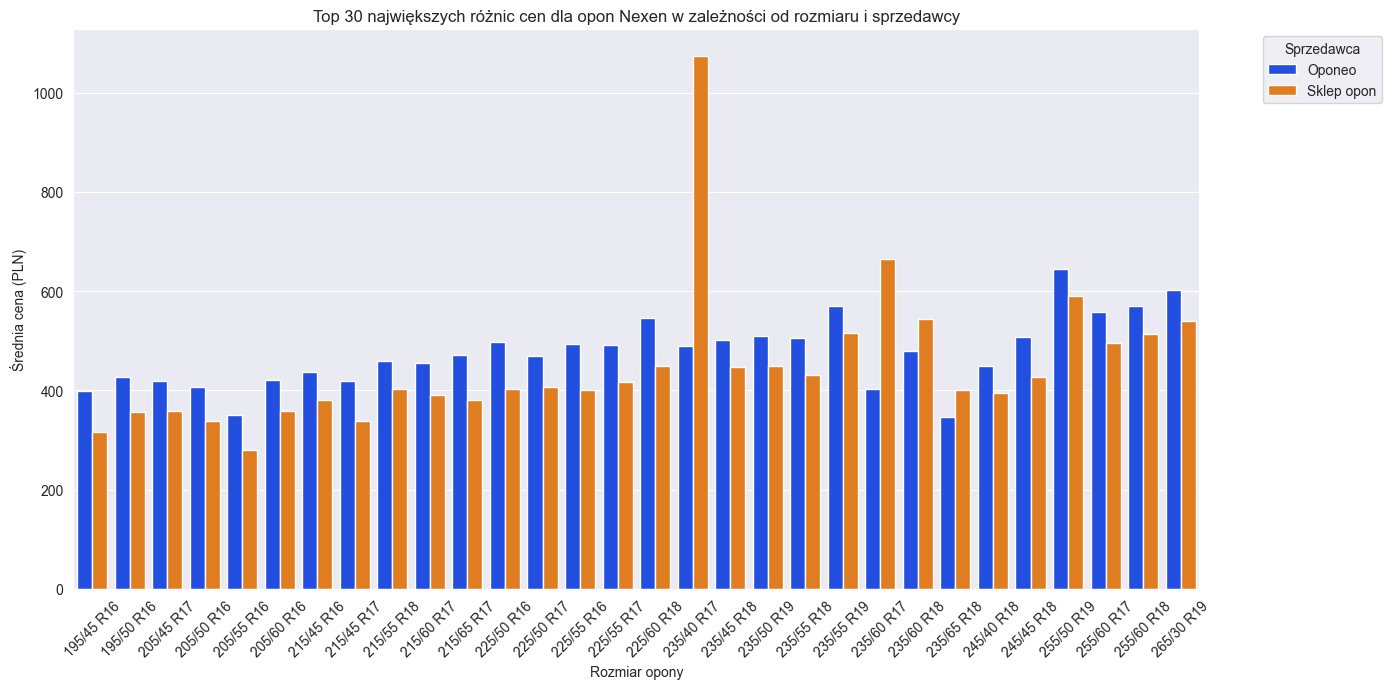

In [23]:
michelin_df = df[df['brand'] == 'Nexen']

avg_price_by_retailer_size = michelin_df.groupby(['retailer', 'size'], observed=True)['price'].mean().reset_index()

price_diff = avg_price_by_retailer_size.groupby('size', observed=True)['price'].agg(['max', 'min']).reset_index()
price_diff['diff'] = price_diff['max'] - price_diff['min']

top_30_diff = price_diff.sort_values(by='diff', ascending=False).head(30)

top_30_sizes = top_30_diff['size'].astype(str).tolist()
filtered_df = avg_price_by_retailer_size.copy()
filtered_df['size'] = filtered_df['size'].astype(str)

filtered_df.loc[:, 'size'] = pd.Categorical(filtered_df['size'], categories=top_30_sizes, ordered=True)

plt.figure(figsize=(14, 7))
sns.barplot(x='size', y='price', hue='retailer', data=filtered_df, palette="bright")
plt.title("Top 30 największych różnic cen dla opon Nexen w zależności od rozmiaru i sprzedawcy")
plt.xlabel("Rozmiar opony")
plt.ylabel("Średnia cena (PLN)")
plt.xticks(rotation=45)
plt.legend(title="Sprzedawca", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

### 3.3. Średnia cena opon w zależności od rozmiaru i sklepu

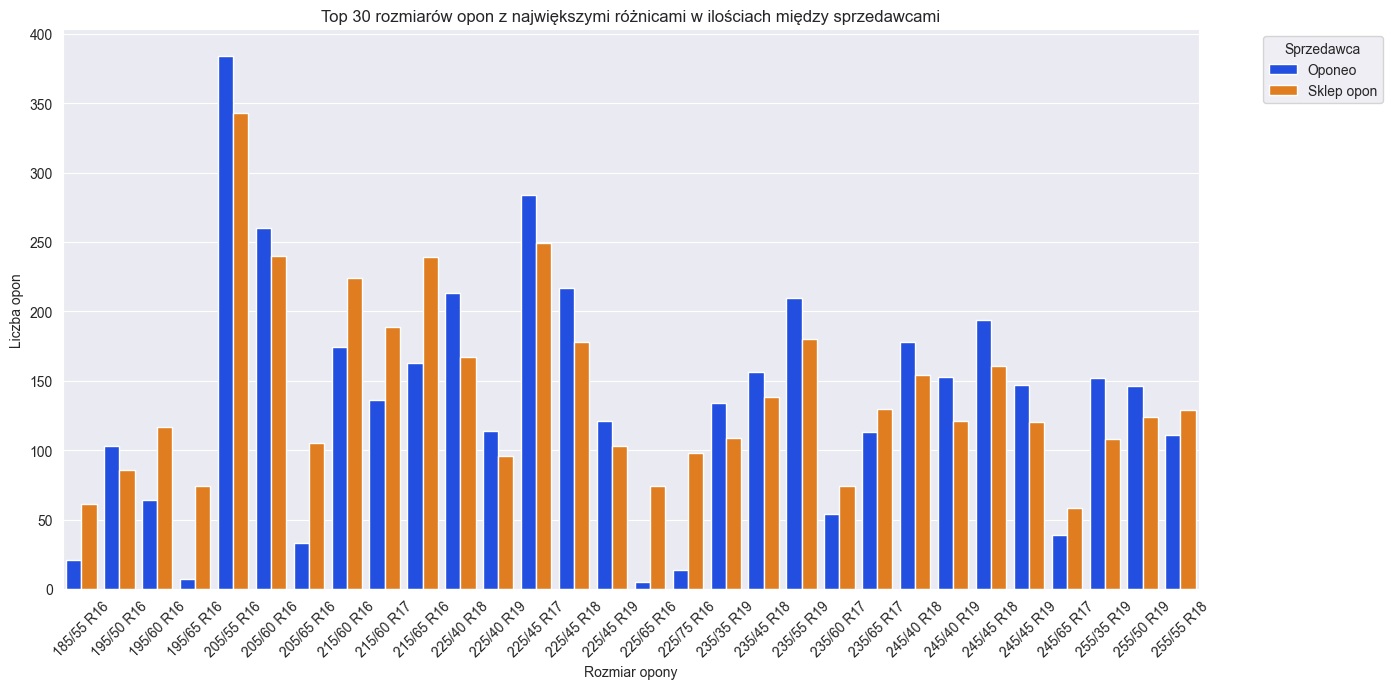

In [24]:
quantity_by_retailer_size = df.groupby(['retailer', 'size'], observed=True).size().reset_index(name='quantity')

plt.show()
# Krok 2: Obliczanie różnicy w ilości opon między sprzedawcami w danym rozmiarze
quantity_diff = quantity_by_retailer_size.groupby('size', observed=True)['quantity'].agg(['max', 'min']).reset_index()
quantity_diff['diff'] = quantity_diff['max'] - quantity_diff['min']

# Krok 3: Wybieranie 30 rozmiarów opon z największą różnicą ilościową
top_30_diff = quantity_diff.sort_values(by='diff', ascending=False).head(30)

# Krok 4: Wybieramy tylko dane dla tych 30 rozmiarów
top_30_sizes = top_30_diff['size'].astype(str).tolist()
filtered_df = quantity_by_retailer_size.copy()
filtered_df['size'] = filtered_df['size'].astype(str)

# Krok 5: Ustawiamy kategorię 'size' z 30 najczęstszymi rozmiarami
filtered_df.loc[:, 'size'] = pd.Categorical(filtered_df['size'], categories=top_30_sizes, ordered=True)

# Krok 6: Tworzymy wykres
plt.figure(figsize=(14, 7))
sns.barplot(x='size', y='quantity', hue='retailer', data=filtered_df, palette="bright")

# Krok 7: Dostosowanie wykresu
plt.title("Top 30 rozmiarów opon z największymi różnicami w ilościach między sprzedawcami")
plt.xlabel("Rozmiar opony")
plt.ylabel("Liczba opon")
plt.xticks(rotation=45)
plt.legend(title="Sprzedawca", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4.1. Średnia cena:
- w zależności od sklepu
- w zależności od sklepu i klasy
- w zależności od marki i sklepu

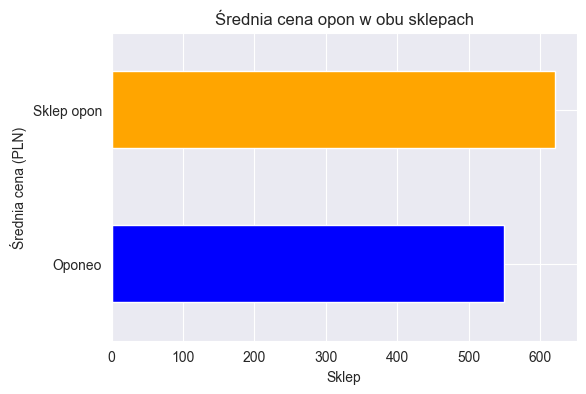

<Figure size 1000x600 with 0 Axes>

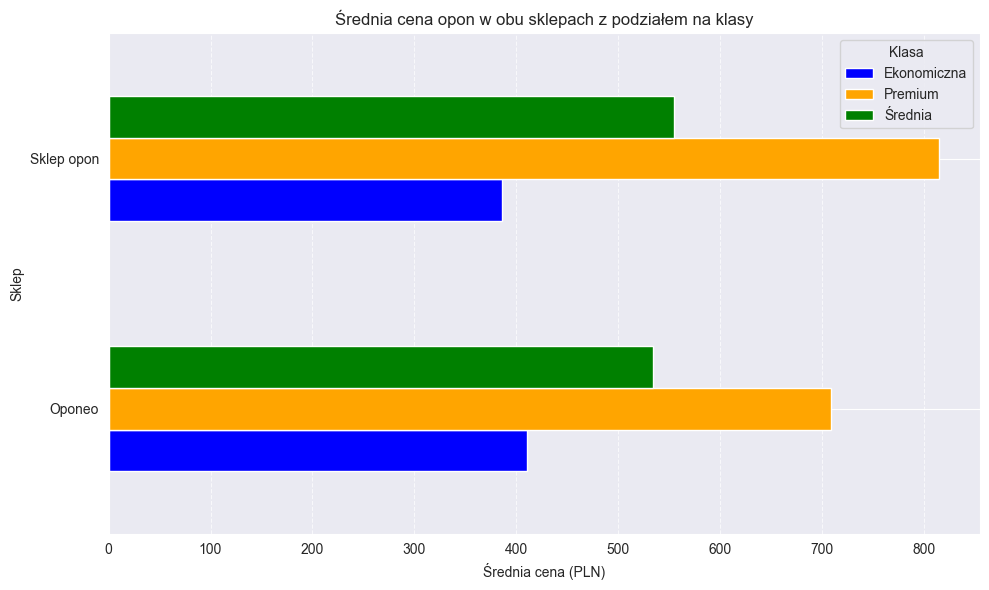

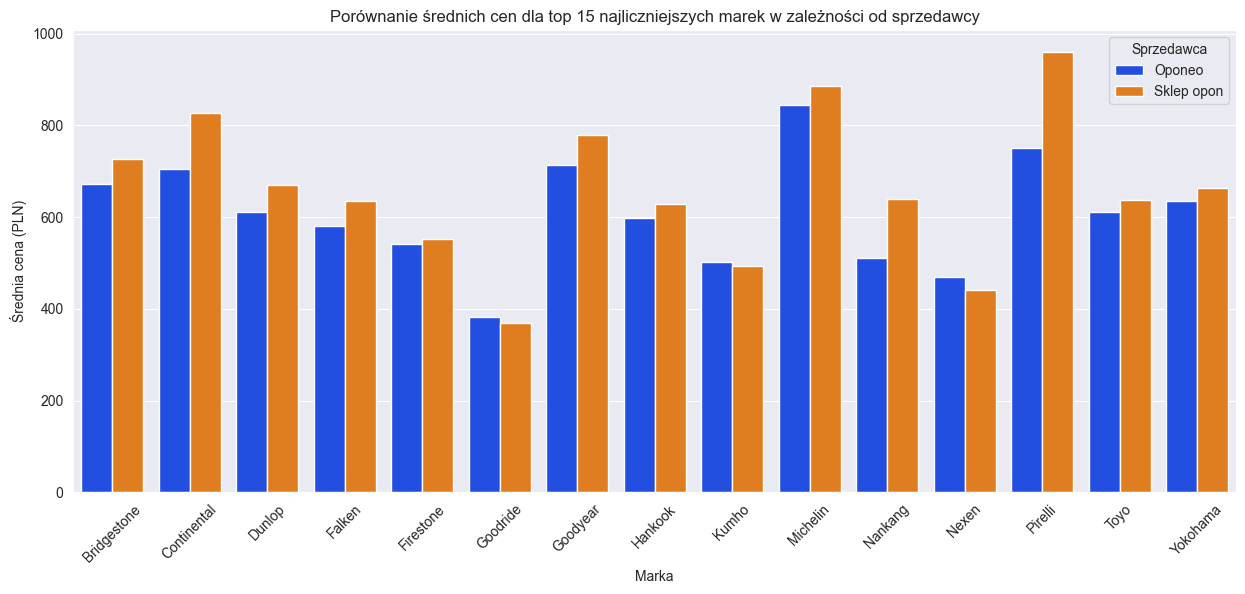

In [27]:
avg_price_by_source = df.groupby('retailer')['price'].mean()
plt.figure(figsize=(6, 4))
avg_price_by_source.plot(kind='barh', color=['blue', 'orange'])
plt.title("Średnia cena opon w obu sklepach")
plt.ylabel("Średnia cena (PLN)")
plt.xlabel("Sklep")
plt.show()

avg_price_by_source_and_class = df.groupby(['retailer', 'class'], observed=False)['price'].mean().unstack()

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
avg_price_by_source_and_class.plot(kind='barh', stacked=False, figsize=(10, 6), color=['blue', 'orange', 'green'])  # Kolory dla klas
plt.title("Średnia cena opon w obu sklepach z podziałem na klasy")
plt.xlabel("Średnia cena (PLN)")
plt.ylabel("Sklep")
plt.legend(title="Klasa", loc='best')  # Legenda dla klas
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

top_15_brands = df['brand'].value_counts().nlargest(15).index
df_top_brands = df[df['brand'].isin(top_15_brands)]
avg_price_by_brand_retailer = df_top_brands.groupby(['brand', 'retailer'])['price'].mean().reset_index()
plt.figure(figsize=(15, 6))
# custom_hex_palette = sns.color_palette(["#66b3ff", "#99ff99"])
# sns.barplot(x='brand', y='price', hue='retailer', data=avg_price_by_brand_retailer, palette=custom_hex_palette)
sns.barplot(x='brand', y='price', hue='retailer', data=avg_price_by_brand_retailer, palette="bright")
plt.title("Porównanie średnich cen dla top 15 najliczniejszych marek w zależności od sprzedawcy")
plt.xlabel("Marka")
plt.ylabel("Średnia cena (PLN)")
plt.xticks(rotation=45)
plt.legend(title="Sprzedawca")
plt.show()

### 4.2. Rozkład:
- indeksu efektywności paliwowej w zależności od sklepu
- indeksu przyczepności na mokrej nawierzchni w zależności od sklepu
- poziomu hałasu w zależności od sklepu
- klas opon w zależności od sklepu

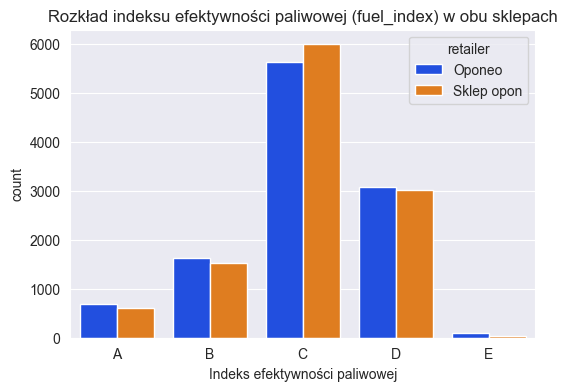

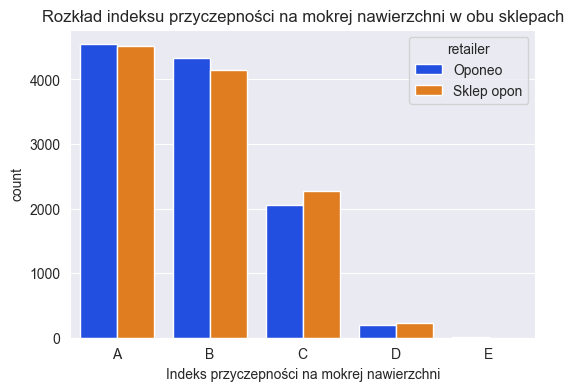

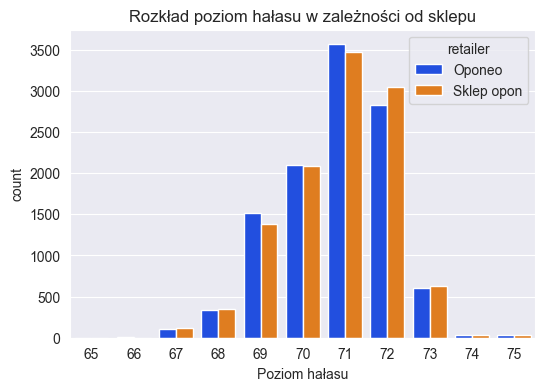

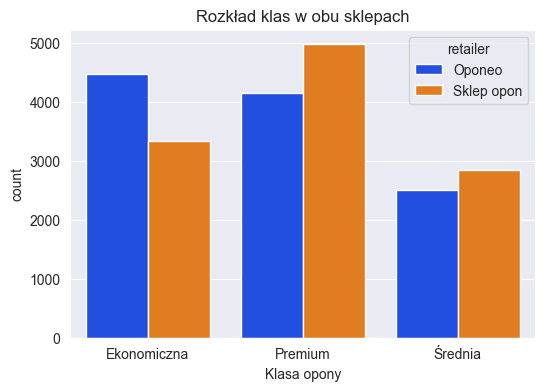

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fuel_index', hue='retailer', data=df, palette='bright')
plt.title("Rozkład indeksu efektywności paliwowej (fuel_index) w obu sklepach")
plt.xlabel("Indeks efektywności paliwowej")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='wet_grip_index', hue='retailer', data=df, palette='bright')
plt.title("Rozkład indeksu przyczepności na mokrej nawierzchni w obu sklepach")
plt.xlabel("Indeks przyczepności na mokrej nawierzchni")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='noise_level', hue='retailer', data=df, palette='bright')
plt.title("Rozkład poziom hałasu w zależności od sklepu")
plt.xlabel("Poziom hałasu")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='class', hue='retailer', data=df, palette='bright')
plt.title("Rozkład klas w obu sklepach")
plt.xlabel("Klasa opony")
plt.show()


### 4.3. Korelacja parametrów
- cena
- klasa
- ocena użytkownika
- poziom hałasu
- indeks efektywności paliwowej
- indeks przyczepności na mokrej nawierzchni

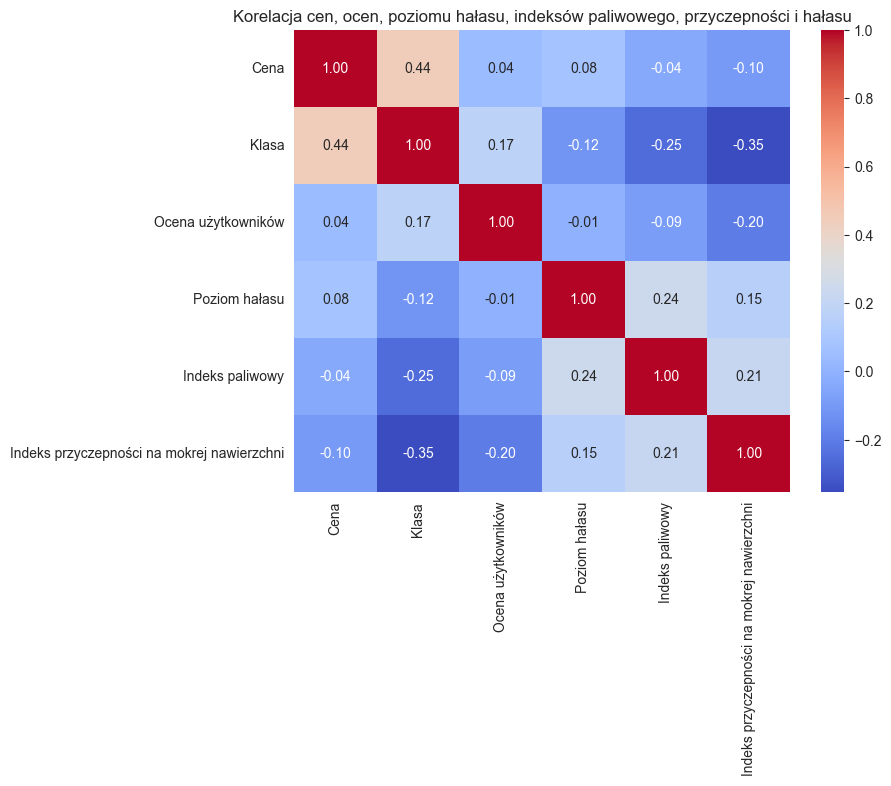

In [12]:
def class_to_int(cls):
    return {'Premium': 3, 'Średnia': 2, 'Ekonomiczna': 1}.get(cls, 0)

def letter_to_int(letter):
    return ord(letter.upper()) - ord('A') + 1

df['fuel_index_int'] = df['fuel_index'].apply(letter_to_int)
df['wet_grip_index_int'] = df['wet_grip_index'].apply(letter_to_int)
df['class_int'] = df['class'].apply(class_to_int)

df_heat_columns = df.rename(columns={
    'price': 'Cena',
    'class_int': 'Klasa',
    'user_rating': 'Ocena użytkowników',
    'noise_level': 'Poziom hałasu',
    'fuel_index_int': 'Indeks paliwowy',
    'wet_grip_index_int': 'Indeks przyczepności na mokrej nawierzchni'
})
correlation = df_heat_columns[['Cena', 'Klasa', 'Ocena użytkowników', 'Poziom hałasu', 
                          'Indeks paliwowy', 'Indeks przyczepności na mokrej nawierzchni']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelacja cen, ocen, poziomu hałasu, indeksów paliwowego, przyczepności i hałasu")
plt.show()

### 4.4. 15 najliczniejszych marek opon w zbiorze danych

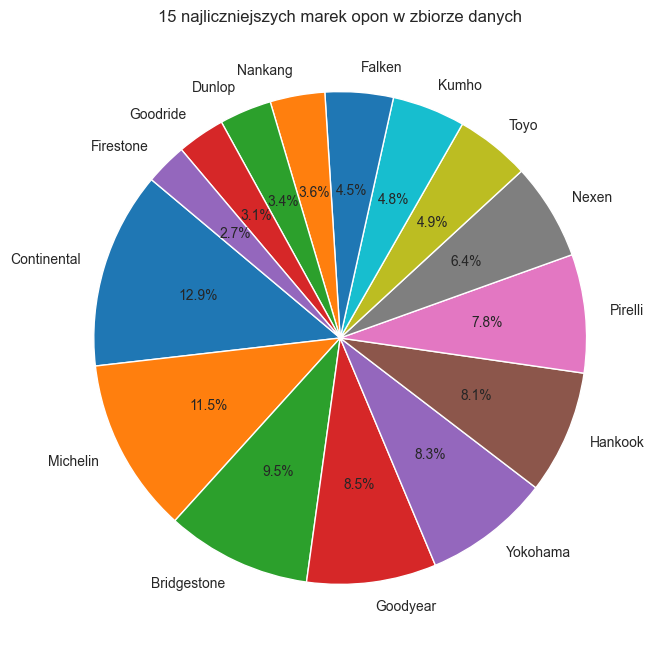

In [13]:
import matplotlib.pyplot as plt

top_15_brands = df['brand'].value_counts().nlargest(15)

plt.figure(figsize=(8, 8))
colors = plt.cm.tab10.colors  # Paleta 10 różnych kolorów
plt.pie(top_15_brands, labels=top_15_brands.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('15 najliczniejszych marek opon w zbiorze danych')
plt.show()


# 5. Porównanie i wnioski

## Kluczowe różnice między sklepami
### Cena:
- Średnia cena opon w Oponeo jest nieco niższa w porównaniu do Sklepu Opon.
- W przypadku tych samych modeli opon, Sklep opon oferuje niższe ceny.
### Cechy opon:
- Sklep Opon ma większy udział opon premium 
- Oponeo ma bardziej zrównoważoną ofertę opon premium, średniej klasy i ekonomicznych.
### Różnorodność oferty:
- Sklep Opon ma większy wybór wysokiej klasy marek i modeli.
- Oponeo zapewnia szerszą gamę opcji w niższych przedziałach cenowych.
### Oceny użytkowników:
- Dla tych samych modeli opon, oceny użytkowników są wyższe w Sklepie Opon w porównaniu do Oponeo.
- Sugeruje to, że klienci są bardziej zadowoleni z zakupów w Sklepie Opon.
### Wnioski i rekomendacje:
- **Najlepszy stosunek jakości do ceny**: Sklep Opon oferuje lepszy stosunek jakości do ceny.<br>
- **Opcje premium**: Dla klientów poszukujących opon premium z wysokiej klasy funkcjami, Sklep Opon jest lepszą opcją.<br>
- **Opcje budżetowe**: Dla klientów poszukujących opon w klasie budżetowej, Oponeo oferuje szerszy wybór opcji.<br>
- **Ogólna rekomendacja**: Oponeo jest polecany ze względu na różnorodność w klasie budżetowej, podczas gdy Sklep Opon jest idealny dla osób poszukujących lepszej obsługi klienta.<br>


# 6. Trenowanie modelu 


- Wybrałem Random Forest Regressor, ponieważ działa dobrze zarówno z danymi numerycznymi, jak i kategorycznymi. Ustawienia, takie jak `n_estimators=100` i `max_depth=10`, pomagają zapobiec przeuczeniu, a `random_state=42` zapewnia powtarzalność.

- Do skalingu cech numerycznych użyłem `MinMaxScaler`, by przekształcić różne skale cech na zakres `[0, 1]`, co poprawia działanie modelu. Skalowanie jest istotne, ponieważ kolumny takie jak `price` i `user_rating` mają różne skale (np. price może być od kilkuset do kilku tysięcy, a user_rating w skali 1–5).

- `OneHotEncoder` koduje zmienne kategoryczne, przekształcając je w dane numeryczne wymagane przez model. Random Forest wymaga danych liczbowych, więc wartości kategoryczne (np. `class`, `size`) muszą być zakodowane (w postaci macierzy binarnej).

- `Pipeline` umożliwia spójne przetwarzanie danych i trenowanie modelu w jednym kroku.

- Obliczając cel (`target`) jako wagę oceny użytkownika i ceny, nadałem wyższy priorytet jakości opony, z uwzględnieniem ceny jako dodatkowego czynnika.

- Podział danych na zbiór treningowy i testowy pozwala ocenić model na nowych danych, minimalizując ryzyko przeuczenia.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd

df = df.dropna()

# Definiowanie cech i kolumn numerycznych
categorical_cols = ['size', 'load_index', 'speed_index', 'fuel_index', 'wet_grip_index', 'noise_index', 'class', 'availability']
numerical_cols = ['price', 'user_rating', 'noise_level']

# Skalowanie cech numerycznych
scaler = MinMaxScaler()

# Obliczanie targetu
weight_rating = 0.8
weight_price = 0.2
df[['price_normalized', 'rating_normalized']] = scaler.fit_transform(df[['price', 'user_rating']])
df['target'] = (df['rating_normalized'] * weight_rating) - (df['price_normalized'] * weight_price)

# Przygotowanie X i y
X = df.drop(['name', 'brand', 'model', 'target'], axis=1)
y = df['target']

# Definiowanie ColumnTransformer i Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['price', 'user_rating',
                                                   'noise_level']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['size', 'load_index',
                                                   'speed_index', 'fuel_index',
                                                   'wet_grip_index',
                                                   'noise_index', 'class',
                                                   'availability'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, random_state=42))])

In [17]:
def recommend_tires_interactive(pipeline, df, top_n=3):
    print("Wprowadź swoje kryteria:")
    max_price = float(input("Maksymalna cena (PLN): "))
    min_rating = float(input("Minimalna ocena użytkownika (1-5): "))
    selected_size = input("Rozmiar opony (np. '205/55 R16'): ")

    # Filtr danych na podstawie wprowadzonych kryteriów
    filtered_df = df[
        (df['price'] <= max_price) &
        (df['user_rating'] >= min_rating) &
        (df['size'] == selected_size)
    ].copy()

    # Jeśli brak wyników, zwróć komunikat
    if filtered_df.empty:
        print("Brak wyników spełniających kryteria.")
        return None

    # Przygotowanie danych wejściowych dla pipeline'u
    columns_to_drop = ['name', 'brand', 'model', 'target']
    columns_to_drop = [col for col in columns_to_drop if col in filtered_df.columns]
    X_filtered = filtered_df.drop(columns=columns_to_drop, errors='ignore')

    # Predykcja
    try:
        filtered_df['predicted_target'] = pipeline.predict(X_filtered)
    except Exception as e:
        print(f"Błąd podczas predykcji: {e}")
        return None

    # Sortowanie wyników i wybór najlepszych
    filtered_df_sorted = filtered_df.sort_values(by='predicted_target', ascending=False)
    print(f"Znaleziono {len(filtered_df_sorted)} wyników. Najlepsze {top_n}:")
    print(filtered_df_sorted.head(top_n))

    return filtered_df_sorted.head(top_n)

recommended_tires = recommend_tires_interactive(pipeline, df, top_n=3)
display(recommended_tires)

Proszę wprowadzić swoje kryteria:
Znaleziono 160 wyników. Najlepsze 3:
                                               name     brand  \
9956   Triangle EffeXSport TH202 225/45 R19 96 Y XL  Triangle   
10631  Yokohama Advan Fleva V701 225/45 R19 96 W XL  Yokohama   
11927                  Azenis RS820 225/45 R19 96 Y    Falken   

                  model        size  load_index speed_index fuel_index  \
9956   EffeXSport TH202  225/45 R19        99.0           Y          D   
10631  Advan Fleva V701  225/45 R19        99.0           W          C   
11927      Azenis RS820  225/45 R19        96.0           Y          C   

      wet_grip_index noise_index  noise_level        class  user_rating  \
9956               B           B           72  Ekonomiczna          6.0   
10631              A           A           67      Premium          6.0   
11927              A           B           70      Średnia          6.0   

        price availability    retailer  price_normalized  rating_norma

name     brand  \
9956   Triangle EffeXSport TH202 225/45 R19 96 Y XL  Triangle   
10631  Yokohama Advan Fleva V701 225/45 R19 96 W XL  Yokohama   
11927                  Azenis RS820 225/45 R19 96 Y    Falken   

                  model        size  load_index speed_index fuel_index  \
9956   EffeXSport TH202  225/45 R19        99.0           Y          D   
10631  Advan Fleva V701  225/45 R19        99.0           W          C   
11927      Azenis RS820  225/45 R19        96.0           Y          C   

      wet_grip_index noise_index  noise_level        class  user_rating  \
9956               B           B           72  Ekonomiczna          6.0   
10631              A           A           67      Premium          6.0   
11927              A           B           70      Średnia          6.0   

        price availability    retailer  price_normalized  rating_normalized  \
9956   377.00         full      Oponeo          0.029120                1.0   
10631  698.00         full      Oponeo          0.070119                1.0   
11927  703.17       medium  Sklep opon          0.070779                1.0   

         target  predicted_target  
9956   0.794176          0.794223  
10631  0.785976          0.786003  
11927  0.785844          0.785750

### 6.1 Zapisanie modelu do pliku

In [18]:
joblib.dump(pipeline, 'data/models/tyres_pipeline.pkl')
df.to_csv("data/models/tyres_data.csv", index=False)
print("Model został zapisany w folderze data/models")

Model został zapisany w folderze data/models
